In [ ]:
#input is in [mm]

Rx1 = 12.717
Ry1 = 14.63041
Rx2 = 31.34
Ry2 = 31.5484
Req = 83.32368
Rir = 50
Lcell = 44.37

#end input


alp_acc = 0.0001

if Rx2 < Ry2 
    phi2 = 90
    a2 = Ry2
else
    phi2 = 0
    a2 = Rx2
end
if Rx1 < Ry1
    phi1 = 90
    a1 = Ry1
else
    phi1 = 0
    a1 = Rx1
end
alpha = 0.0
alpha2 = pi
alpha1 = 0.0
slope2= 100
slope1 = 0
#getting the ellipse angles of the tanget position
while abs(slope2 - slope1) > alp_acc
    alpha = alpha + alp_acc
    alpha1 = pi/2 + atan(Rx1/Ry1 * tan(alpha))
    slope1 = Ry1 / Rx1 * tan(alpha1-pi/2)
    alpha2 = atan(slope1*Rx2/Ry2) + pi/2
    slope2 = ((Rir + Ry1*(1-sin(alpha1)))-(Req - Ry2*(1- sin(alpha2))))/(Lcell-Rx1*cos(alpha1)-Rx2*cos(alpha2))
end

if alpha2 < 0 
    alpha2 = -alpha2
elseif alpha2 > pi / 2 Then
    alpha2 = alpha2 - pi
    if alpha2 < 0
        alpha2 = -alpha2
    else
        alpha2 = alpha2
    end
else
    alpha2 = alpha2
end
if alpha1 < 0
    alpha1 = -alpha1
elseif alpha1 > pi / 2
    alpha1 = alpha1 - pi
    if alpha1 < 0
        alpha1 = -alpha1
    else
        alpha1 = alpha1
    end
else
    alpha1 = alpha1
end

x1 = 0 + Rx2 * cos(alpha2)
y1 = Req - Ry2 * (1 - sin(alpha2))
x2 = Lcell - Rx1 * cos(alpha1)
y2 = Rir + Ry1 * (1 - sin(alpha1))

slope = (y2-y1)/(x2-x1)
yint = (y1-slope)/x1
d = -(Rir-yint)/slope
angle = atan(slope)*180/pi+90
H = (Req-Ry1-Ry2-Rir)

#angle is to the vertical
println("Iris radius[cm]: $(Rir/10)")
println("Wall angle: $(angle)")
println("R = B/A eq: $(Ry2/Rx2)")
println("r = b/a iris: $(Ry1/Rx1)")
println("d [cm]: $(d/10) ")
println("HalfCellLength [cm]:$(Lcell/10)")
println("H, centers distance [cm]: $(H/10)")


242


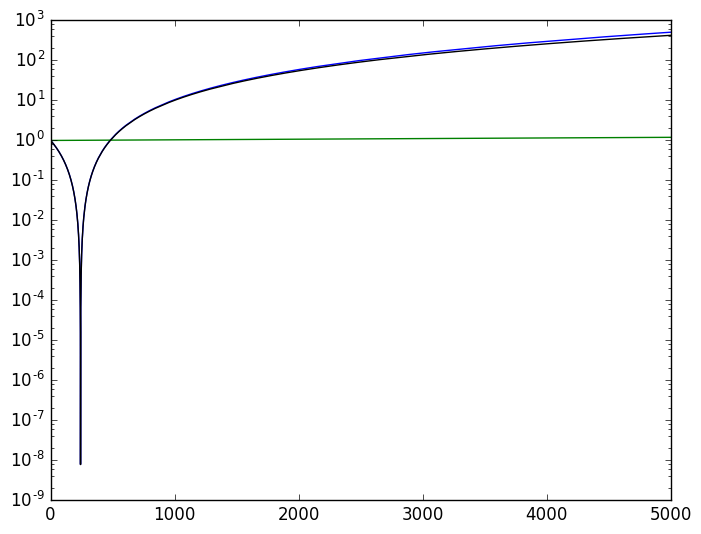

Rx1=23.692
Ry1=18.9536
Rx2=16.953213199999986
Ry2=16.953213199999986
Req=83.014
Riris=30
Lcell=45.0


In [1]:

#values from superfish in its units.
Requator = 8.3014           #euqator radius
Rir_inp   = 3             #Iris radius
angleinp = 12  #wall angle in deg
Rdome = 1                #ellipse ratio at equator 
riris = 0.8   #ellipse ratio at iris
dinp     = 2  # distance of tangent from iris at irisheight
Lcellinp = 4.5           #Cell length
Hinp = 1.71071868 #vertical distance between ellipse centers

#unit convertion to [mm]
Rir = Rir_inp*10
Req = Requator*10
Hmm = Hinp*10
Lcell = Lcellinp*10


#best guess for Rx1, around which search is done. Rx2, Ry1, Ry2 are defined by this one alone
Rx1guess = 25.95 #[mm]
#range around Rx1guess where search is conducted
searchrange = 5 #[mm]
#number of search steps
n_interations = 5000
#accuracy of ellipse angles
alpha_accuracy = 0.1
#guesstimates
Rx1best = 1.0
Ry1best = 1.0
Rx2best = 1.0
Ry2best = 1.0

tol = zeros(n_interations)
Harray = zeros(n_interations)
darray = zeros(n_interations)
angleArray = zeros(n_interations)
tolerance = 1000000000000

stepsize = searchrange/n_interations
iter = 5
n = 0


function CellAlpha1(x1,y1,x2,y2,eqR,IrisR,CellLength)
    slope1 = 0.01
    slope2 = 123123.1
    alpha = pi
    alpha1 = 0.0
    alpha2 = 0.0
    if x1 + x2 < CellLength
        while abs(slope1-slope2) > alpha_accuracy
            alpha = alpha + alpha_accuracy/1000
            alpha1 = pi/2 + atan(x1/y1 * tan(alpha))
            slope1 = y1 / x1 * tan(alpha1-pi/2)
            alpha2 = atan(slope1*x2/y2) + pi/2
            slope2 = ((IrisR + y1*(1-sin(alpha1)))-(eqR - y2*(1- sin(alpha2))))/(CellLength-x1*cos(alpha1)-x2*cos(alpha2))
        end
    elseif x1 + x2 == CellLength
        alpha1 = pi/2
        alpha2 = pi/2
    else 
        alpha = pi/2
        while abs(slope2 - slope1) > alpha_accuracy
            alpha = alpha + alpha_accuracy/1000
            alpha1 = pi/2 + atan(x1/y1 * tan(alpha))
            slope1 = y1 / x1 * tan(alpha1-pi/2)
            alpha2 = atan(slope1*x2/y2) + pi/2
            slope2 = ((IrisR + y1*(1-sin(alpha1)))-(eqR - y2*(1- sin(alpha2))))/(CellLength-x1*cos(alpha1)-x2*cos(alpha2))
        end
    end
    return alpha1
end


function CellAlpha2(x1,y1,x2,y2,eqR,IrisR,CellLength)
    slope1 = 0.01
    slope2 = 123123.1
    alpha = pi
    alpha1 = 0.0
    alpha2 = 0.0
    if x1 + x2 < CellLength
        while abs(slope1-slope2) > alpha_accuracy
            alpha = alpha + alpha_accuracy/1000
            alpha1 = pi/2 + atan(x1/y1 * tan(alpha))
            slope1 = y1 / x1 * tan(alpha1-pi/2)
            alpha2 = atan(slope1*x2/y2) + pi/2
            slope2 = ((IrisR + y1*(1-sin(alpha1)))-(eqR - y2*(1- sin(alpha2))))/(CellLength-x1*cos(alpha1)-x2*cos(alpha2))
        end
    elseif x1 + x2 == CellLength
        alpha1 = pi/2
        alpha2 = pi/2
    else 
        alpha = pi/2
        while abs(slope2 - slope1) > alpha_accuracy
            alpha = alpha + alpha_accuracy/1000
            alpha1 = pi/2 + atan(x1/y1 * tan(alpha))
            slope1 = y1 / x1 * tan(alpha1-pi/2)
            alpha2 = atan(slope1*x2/y2) + pi/2
            slope2 = ((IrisR + y1*(1-sin(alpha1)))-(eqR - y2*(1- sin(alpha2))))/(CellLength-x1*cos(alpha1)-x2*cos(alpha2))
        end
    end
    return alpha2
end


for i = 1:n_interations
    Rx1 = Rx1guess-searchrange/2 + i*stepsize
    Ry1 = Rx1*riris
    Ry2 = Req-Hmm-Rir-Ry1
    Rx2 = Ry2/Rdome
    A2 = CellAlpha2(Rx1,Ry1,Rx2,Ry2,Req,Rir,Lcell)
    A1 = CellAlpha1(Rx1,Ry1,Rx2,Ry2,Req,Rir,Lcell)
    x1 = 0 + Rx2 * cos(A2)
    y1 = Req - Ry2 * (1 - sin(A2))
    x2 = Lcell - Rx1 * cos(A1)
    y2 = Rir + Ry1 * (1 - sin(A1))

    slope = (y2-y1)/(x2-x1)
    yint = (y1-slope)/x1
    d = -(Rir-yint)/slope
    angle = atan(slope)*180/pi+90
    H = (Req-Ry1-Ry2-Rir)

    Harray[i] = (H-Hinp*10)^2
    darray[i] = (d-dinp*10)^2
    angleArray[i] = (angle-angleinp)^2

    sumsquard = darray[i]*angleArray[i]
    tol[i] = sumsquard
    if sumsquard < tolerance
        tolerance = sumsquard
        iter = i
        Rx1best = Rx1
        Ry1best = Ry1
        Rx2best = Rx2
        Ry2best = Ry2
    end

    #println(sumsquard)

end
Harray = Harray / Harray[1]
darray = darray / darray[1]
angleArray = angleArray / angleArray[1]
iteration = (1:1:n_interations)
tol = darray .* angleArray 
#println(tolerance)
using PyPlot
p = plot(iteration,tol, "b-",iteration,darray,"g-",iteration,angleArray,"k-",)
# ,iteration,Harray,"r-",
ax=gca()
ax[:set_yscale]("log")

println(iter)

println("Rx1=$(Rx1best)")
println("Ry1=$(Ry1best)")
println("Rx2=$(Rx2best)")
println("Ry2=$(Ry2best)")

println("Req=$(Req)")
println("Riris=$(Rir)")
println("Lcell=$(Lcell)")
